In [1]:
import os
import pandas as pd
import tweepy as tw
import seaborn as sns
import string
# import matplotlib.pyplot as plt

import itertools
import collections

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [2]:
from nltk.corpus import stopwords
import string
import nltk

In [3]:
api_key="Hxh3XPIdMuvGi6CRhaJplZVQF"
api_secret= "ZHrw0QbqqBElOtdWbZK90s6QYTl6BUj24Aad0462W3KHTpZVAh"
access_token = "846412731926413317-GHRx2c3ANGqJkgBJIb9YJYhnQ4adBY3"
access_token_secret= "cke8pH4s2Eiexw1ln3N71dCbiAnhZO8mrDaddpVO0a94v"

## Autorização


In [4]:

auth = tw.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)


## get Twttews

In [5]:
search_term ='#bolsonaro -filter:retweets'


In [6]:
tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="pt",
                   since='2019-01-01').items(1000)

all_tweets =  [ tweet.text for tweet in tweets]

TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/search/tweets.json?q=%23bolsonaro+-filter%3Aretweets&lang=pt&since=2019-01-01 (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))

In [265]:
all_tweets[0:5]

['Ricardo Salles estava todo pimposo em Noronha nessa segunda-feira. Hoje fico sabendo que liberaram navios de cruzei… https://t.co/5RWNUhlkpf',
 'Depois da divulgação do pior PIB dos últimos 3 anos, o que o presidente deve fazer? Chamar um comediante pra coleti… https://t.co/ga1e8k8wtS',
 'Postei lá na rede do Zuckerberg, vou postar aqui também. #Bolsonaro #coronavirusnobrasil #CoronaVirus… https://t.co/YbVn1LdFUm',
 'Se não fosse Presidente #Bolsonaro, continuaríamos nesse socialismo pseudo democrata que estava a caminho do totali… https://t.co/O8wWYoRPRj',
 '@BrazilFight Sim !! Avante #Presidente #BOLSONARO']

## Funções de tratamento de dados

In [346]:
custon_stop_words = ['nessa','todo','pra','vou','aqui','se','.',',','lá','vcs','""','"',':','``']

In [347]:
punctuation = list(string.punctuation)
lista_stopwords  = set(stopwords.words('portuguese') + punctuation + custon_stop_words+ ['rt', 'via'])



In [336]:
def remove_url(txt):
    return re.sub(r'http\S+', '', txt)
    
    

In [276]:
remove_url('Ricardo Salles estava todo pimposo em Noronha nessa segunda-feira. Hoje fico sabendo que liberaram navios de cruzei… https://t.co/5RWNUhlkpf')

'Ricardo Salles estava todo pimposo em Noronha nessa segunda-feira. Hoje fico sabendo que liberaram navios de cruzei… '

In [337]:
def remove_stop_Words(txt,lista_stopwords):
    palavras =set_tokenize(txt)
    palavras_sem_stopwords = [palavra.lower() for palavra in palavras if palavra.lower() not in lista_stopwords]
    return str(palavras_sem_stopwords)

In [338]:
def set_tokenize(tweet):
    return word_tokenize(tweet)

In [339]:
set_tokenize('Ricardo Salles estava todo pimposo em Noronha nessa segunda-feira. Hoje fico sabendo que liberaram navios de cruzei… https://t.co/5RWNUhlkpf')

['Ricardo',
 'Salles',
 'estava',
 'todo',
 'pimposo',
 'em',
 'Noronha',
 'nessa',
 'segunda-feira',
 '.',
 'Hoje',
 'fico',
 'sabendo',
 'que',
 'liberaram',
 'navios',
 'de',
 'cruzei…',
 'https',
 ':',
 '//t.co/5RWNUhlkpf']

In [308]:
remove_stop_Words('Ricardo Salles estava todo pimposo em Noronha nessa segunda-feira. Hoje fico sabendo que liberaram navios de cruzei… https://t.co/5RWNUhlkpf',lista_stopwords)

"['ricardo', 'salles', 'pimposo', 'noronha', 'segunda-feira', 'hoje', 'fico', 'sabendo', 'liberaram', 'navios', 'cruzei…', 'https', '//t.co/5rwnuhlkpf']"

In [421]:
def remove_caracteres_especiais(texto):
   remove= 
   return str(remove_4)

In [422]:
remove_caracteres_especiais('@veramagalhaes] ] ] [[] Falou a militante do PSDB e Extrema-imprensa. Vcs no percebem q estão desacreditados perante a opini…')

"['@veramagalhaes', '', '', '', 'Falou', 'a', 'militante', 'do', 'PSDB', 'e', 'Extrema-imprensa', 'Vcs', 'no', 'percebem', 'q', 'estão', 'desacreditados', 'perante', 'a', 'opini…']"

In [409]:
def pre_process(txt,lista_stopwords):
    remove= remove_url(txt)
    remove_caracteres = remove_caracteres_especiais(txt)
    lista =remove_stop_Words(remove,lista_stopwords)
    return lista


In [412]:
pre_process('@veramagalhaes] Falou[] a militante do PSDB e Extrema-imprensa. Vcs no percebem q estão desacreditados perante a opini… https://t.co/QYkebUPBuR',lista_stopwords)

"['veramagalhaes', 'falou', 'militante', 'psdb', 'extrema-imprensa', 'percebem', 'q', 'desacreditados', 'perante', 'opini…']"

In [399]:
all_tweets[5:10]

['Muita vergonha viver no Brasil nesse momento. #Bolsonaro #BoboDaCorte https://t.co/CiEyGDHoqb',
 'Se no governo de @dilmabr tinha o personagem #DilmaBolada, hoje, no governo de @jairbolsonaro apareceu o… https://t.co/z75JJJxsSG',
 'Depois do papelão que #Bolsonaro pai fez na coletiva de imprensa, olha quem resolveu dar o ar da graça novamente no… https://t.co/GuzgUeERpY',
 'E ai #ReginaDuarte,tu continua com medo do #PT ou dos #Olavetes do #Bolsonaro???#ForaRegina',
 '@veramagalhaes Falou a militante do PSDB e Extrema-imprensa. Vcs no percebem q estão desacreditados perante a opini… https://t.co/QYkebUPBuR']

## Normalize


In [400]:
twttwes_processados = [pre_process(tweet,lista_stopwords) for tweet in all_tweets]



In [401]:
twttwes_processados[10:20]

["['boa', 'reportagem', 'sobre', 'servidores', '...', 'bolsonaro', 'parasita', 'revistapiaui', 'fics_edu', 'puc_sp', 'ambracollege…']",
 "['acho', 'lindo', 'perguntando', 'pagou', 'carioca', 'esqueceram', 'esquema', 'corrupção', 'secom', 'hein', 'gent…']",
 "['georgmarques', 'vem', 'pro', 'brazil', 'investidor', 'mbl', 'trouxa', 'dcm_online', 'pibinho', 'pib', 'bolsonaro', 'ipiranga', 'bozo']",
 "['contamos', 'presença', 'todos', 'coronelabezerra', 'dia15porbolsonaro', 'dia15pelobrasil', 'dia15brasilnasruas…']",
 "['entendi', 'galera', 'cancelando', 'carioca', 'verdade', 'tava', 'cancelado', 'tempo', 'entregou', 'merda', 'a…']",
 "['carioca', 'lobão', 'roger', 'moreira', 'regina', 'duarte', 'suzana', 'vieira', '...', 'série', 'b', 'cultura', 'brasileira..', 'humorista…']",
 "['gov', 'bolsonaro', 'conseguiu', 'proeza', 'ter', 'pib', 'menor', 'q', 'temer', 'temer', 'tendo', 'mandato', 'mergulhado', 'd…']",
 "['jesus', 'olhem', 'merda', 'parabéns', 'envolvidos', 'bolsonaro']",
 "['bolsona

## Pre Analise dos dados

##  faz o split de cada texto no twtter

In [376]:
words_in_tweet = [tweet.lower().split() for tweet in twttwes_processados]
words_in_tweet[0:1]

[["['ricardo',",
  "'salles',",
  "'pimposo',",
  "'noronha',",
  "'segunda-feira',",
  "'hoje',",
  "'fico',",
  "'sabendo',",
  "'liberaram',",
  "'navios',",
  "'cruzei…']"]]

## Calcular a frequencia das palavras

In [383]:
all_words_no_urls  = list(itertools.chain(*words_in_tweet))

counts_filter_twtters = collections.Counter(all_words_no_urls )


clean_tweets_dataframe = pd.DataFrame(counts_filter_twtters.most_common(15),
                             columns=['termo', 'quantidade'])

clean_tweets_dataframe.head(15)

,termo,quantidade
0,"'bolsonaro',",488
1,'bolsonaro'],119
2,"'brasil',",95
3,"'...',",95
4,"'presidente',",79
5,"['bolsonaro',",67
6,"'governo',",53
7,"'jairbolsonaro',",50
8,"""''"",",46
9,"'sobre',",44


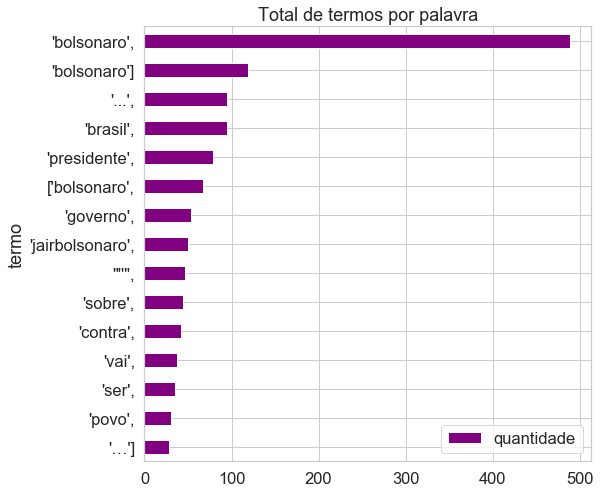

In [385]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_dataframe.sort_values(by='quantidade').plot.barh(x='termo',
                      y='quantidade',
                      ax=ax,
                      color="purple")

ax.set_title("Total de termos por palavra")

plt.show()

In [387]:
len(all_words_no_urls)

10072

In [360]:
terms_hash = [term for term in set_tokenize(all_tweets['text']) 
              if term.startswith('#')]

terms_hash              

TypeError: list indices must be integers or slices, not str

A função bigrams () do NLTK pegará uma lista de tokens e produzirá uma lista de tuplas usando tokens adjacentes. Observe que poderíamos usar o terms_all para calcular os bigrams, mas provavelmente acabaríamos com muito lixo. No caso de decidirmos analisar n-gramas mais longos (sequências de n fichas), pode fazer sentido manter as palavras de parada, caso desejemos capturar frases como “ser ou não ser”.

In [354]:
from nltk import bigrams 
 
terms_bigram = bigrams(texto)

for item in terms_bigram:
    print(item)

'o')
('o', 's')
('s', "'")
("'", ',')
(',', '"')
('"', ',')
(',', ' ')
(' ', '"')
('"', "'")
("'", 'i')
('i', 's')
('s', "'")
("'", ',')
(',', '"')
('"', ',')
(',', ' ')
(' ', "'")
("'", '"')
('"', '\\')
('\\', "'")
("'", '\\')
('\\', "'")
("'", '"')
('"', ',')
(',', "'")
("'", ',')
(',', ' ')
(' ', '"')
('"', "'")
("'", 'e')
('e', 'n')
('n', 'g')
('g', 'r')
('r', 'a')
('a', 'ç')
('ç', 'a')
('a', 'd')
('d', 'o')
('o', "'")
("'", ',')
(',', '"')
('"', ',')
(',', ' ')
(' ', '"')
('"', "'")
("'", 'c')
('c', 'i')
('i', 'r')
('r', 'o')
('o', "'")
("'", ',')
(',', '"')
('"', ',')
(',', ' ')
(' ', '"')
('"', "'")
("'", 'f')
('f', 'a')
('a', 'l')
('l', 'a')
('a', 'n')
('n', 'd')
('d', 'o')
('o', "'")
("'", ',')
(',', '"')
('"', ',')
(',', ' ')
(' ', '"')
('"', "'")
("'", 'a')
('a', 'm')
('m', 'i')
('i', 'g')
('g', 'o')
('o', "'")
("'", ',')
(',', '"')
('"', ',')
(',', ' ')
(' ', '"')
('"', "'")
("'", 'l')
('l', 'u')
('u', 'l')
('l', 'a')
('a', "'")
("'", ',')
(',', '"')
('"', ',')
(',', ' ')
(

In [304]:
# words_in_tweet = list(words_in_tweet)
# texto =str(words_in_tweet)
# texto

In [322]:
texto

, "\'requerimento\',", "\'deputado\',", "\'vermos\',", "\'quanto\',", "\'playmobil\',", "\'tá\',", "\'rec…\']"], ["[\'bolsonaro\',", "\'orgulho\',", "\'povo\',", "\'brasileiro\']"], ["[\'gleisi\',", "\'bolsonaro\',", "\'poder\',", "\'estragar\',", "\'economia\',", "\'mundo\',", "\'...\',", "\'kkkkkkkkkkkk\',", "\'vcs\',", "\'passam\',", "\'muita\',", "\'vergonha\',", "\'...\',", "\'são\',", "\'sa…\']"], ["[\'folha\',", "\'folha_poder\',", "\'glo\',", "\'feita\',", "\'substituir\',", "\'pm\',", "\'salvar\',", "\'pele\',", "\'governadores\',", "\'irresponsáveis\',", "\'qu…\']"], ["[\'dia15euvou\',", "\'dia15pelobrasil\',", "\'quemmandoumatarbolsonaro\',", "\'bolsonaro\',", "\'dia15brasilnasruas\',", "\'dia15porbolsonaro\',", "\'todos\',", "\'juntos\',", "\'ordem\',", "\'progresso\']"], ["[\'erikakokay\',", "\'bolsonaro\',", "\'🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷\',", "\'dia\',", "\'15\',", "\'vamos\',", "\'mostrar\',", "\'força\',", "\'corruptos\',", "\'esquerda\',", "\'nervosos\']"], ["[\'ja

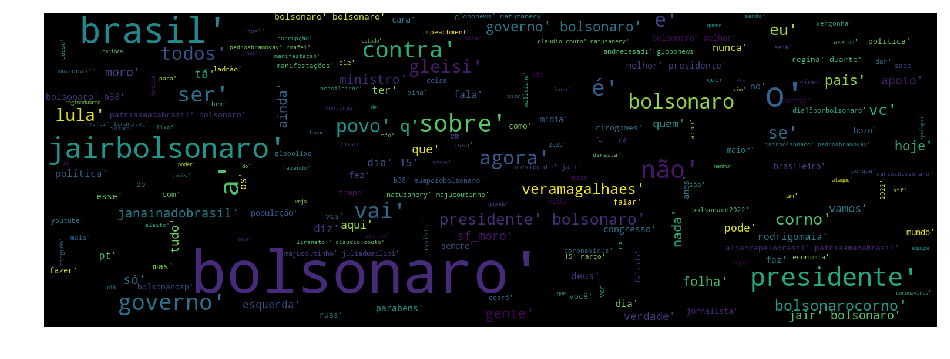

In [329]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(texto)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()